In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import os

In [42]:
# load the data
def load_data(path : str) -> pd.DataFrame:
    current_dir = os.path.join(os.getcwd())
    parent_dir = os.path.dirname(current_dir)
    data_path = os.path.join(parent_dir, path)

    if not os.path.exists(data_path):
        raise FileNotFoundError(f"Data file not found at {data_path}")
    
    df = pd.read_csv(data_path)
    return df

    

In [43]:
# data loading
df = load_data('data/raw/weather_data.csv')

In [44]:
# weather description count
weather_code_map = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    56: "Light freezing drizzle",
    57: "Dense freezing drizzle",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    66: "Light freezing rain",
    67: "Heavy freezing rain",
    71: "Slight snowfall",
    73: "Moderate snowfall",
    75: "Heavy snowfall",
    77: "Snow grains",
    80: "Slight rain showers",
    81: "Moderate rain showers",
    82: "Violent rain showers",
    85: "Slight snow showers",
    86: "Heavy snow showers",
    95: "Slight or moderate thunderstorm",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

In [45]:
# select relevant features for temprature classification
features = [
    "time",
    'temperature_2m',
    "relative_humidity_2m",
    "dew_point_2m",
    "apparent_temperature",
    "precipitation",
    "pressure_msl",
    "cloudcover",
    "cloudcover_low",
    "cloudcover_mid",
    "cloudcover_high",
    "windspeed_10m",
    "windgusts_10m",
    "winddirection_10m",
    "sunshine_duration",
    "shortwave_radiation",
    "diffuse_radiation",
    "direct_radiation",
    "terrestrial_radiation",
]

target = df['weather_code'].map(weather_code_map).values

main_df = df[features]

main_df.insert(1, 'weather_code_map', target)

In [46]:
tem_df = main_df[main_df['weather_code_map'].isin(['Clear sky', 'Overcast'])]

In [47]:
tem_df.shape

(130935, 20)

In [48]:
tem_df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,windgusts_10m,winddirection_10m,sunshine_duration,shortwave_radiation,diffuse_radiation,direct_radiation,terrestrial_radiation
count,130935.000000,130935.000000,130935.000000,130935.000000,130935.0,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000,130935.000000
mean,23.562530,74.675335,18.205453,25.972241,0.0,1009.438042,36.017459,11.847818,9.165533,28.355825,7.755760,15.928254,201.795051,1249.158227,170.275495,53.170222,117.105274,309.367002
std,5.642379,18.331704,5.768959,7.629793,0.0,5.830166,44.407573,26.171253,19.217329,42.378434,3.526318,7.548716,104.408247,1667.471372,259.135346,77.129777,199.636428,426.070159
min,6.100000,10.000000,-0.400000,4.500000,0.0,989.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,62.000000,13.200000,20.100000,0.0,1004.800000,0.000000,0.000000,0.000000,0.000000,5.500000,10.400000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.600000,80.000000,18.000000,26.900000,0.0,1010.600000,7.000000,0.000000,0.000000,0.000000,7.300000,14.400000,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.500000,90.000000,24.200000,32.100000,0.0,1014.100000,95.000000,8.000000,9.000000,85.000000,9.300000,20.200000,304.000000,3600.000000,304.000000,107.000000,167.000000,648.550000
max,41.400000,100.000000,29.700000,46.000000,0.0,1024.200000,100.000000,100.000000,100.000000,100.000000,33.400000,66.600000,360.000000,3600.000000,1034.000000,459.000000,884.000000,1319.600000


In [49]:
# precipitation drop
tem_df.drop('precipitation', axis=1, inplace=True)

C:\Users\shahr\AppData\Local\Temp\ipykernel_12640\1096816546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem_df.drop('precipitation', axis=1, inplace=True)


In [50]:
main_df['weather_code_binary'] = main_df['weather_code_map'].map({
    'Clear sky': 0,
    'Overcast': 1,
    'Slight rain': 2,
    'Moderate rain': 2,
    'Heavy rain': 2

})

C:\Users\shahr\AppData\Local\Temp\ipykernel_12640\1636345139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['weather_code_binary'] = main_df['weather_code_map'].map({


In [51]:
main_df['weather_code_binary'].value_counts()

weather_code_binary
0.0    85012
1.0    45923
2.0    11391
Name: count, dtype: int64

# Run ANOVA or t-tests on all numerical features

In [52]:
df_binary = main_df[main_df['weather_code_map'].isin(['Clear sky', 'Overcast', 'Slight rain', 'Moderate rain', 'Heavy rain'])].copy()
df_binary['weather_code_binary'] = df_binary['weather_code_map'].map({
    'Clear sky': 0,
    'Overcast': 1,
    'Slight rain': 2,
    'Moderate rain': 2,
    'Heavy rain': 2

})



In [53]:
from scipy.stats import f_oneway

def binary_anova(df, label_col, numerical_features):
    results = []

    for feature in numerical_features:
        group0 = df[df[label_col] == 0][feature]
        group1 = df[df[label_col] == 1][feature]

        f_val, p_val = f_oneway(group0, group1)
        results.append((feature, f_val, p_val))

    results.sort(key=lambda x: x[1], reverse=True)  # sort by F-value
    return pd.DataFrame(results, columns=['Feature', 'F-Value', 'P-Value'])


In [54]:
numerical_cols = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
    'pressure_msl', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
    'cloudcover_high', 'windspeed_10m', 'windgusts_10m', 'winddirection_10m',
    'sunshine_duration', 'shortwave_radiation', 'diffuse_radiation',
    'direct_radiation', 'terrestrial_radiation'
]

anova_results = binary_anova(df_binary, 'weather_code_binary', numerical_cols)
print(anova_results)  # Top 10 most important features


                  Feature       F-Value        P-Value
0              cloudcover  8.728688e+06   0.000000e+00
1         cloudcover_high  4.760606e+05   0.000000e+00
2            dew_point_2m  6.069153e+04   0.000000e+00
3          cloudcover_low  5.357725e+04   0.000000e+00
4          cloudcover_mid  5.051910e+04   0.000000e+00
5            pressure_msl  4.498991e+04   0.000000e+00
6    apparent_temperature  2.870572e+04   0.000000e+00
7       winddirection_10m  1.664277e+04   0.000000e+00
8          temperature_2m  1.575202e+04   0.000000e+00
9    relative_humidity_2m  1.462195e+04   0.000000e+00
10          windgusts_10m  1.094345e+04   0.000000e+00
11          windspeed_10m  7.535047e+03   0.000000e+00
12       direct_radiation  4.061475e+03   0.000000e+00
13      diffuse_radiation  3.513351e+03   0.000000e+00
14      sunshine_duration  1.761277e+03   0.000000e+00
15    shortwave_radiation  9.644908e+02  5.521180e-211
16  terrestrial_radiation  3.300512e+02   1.154404e-73


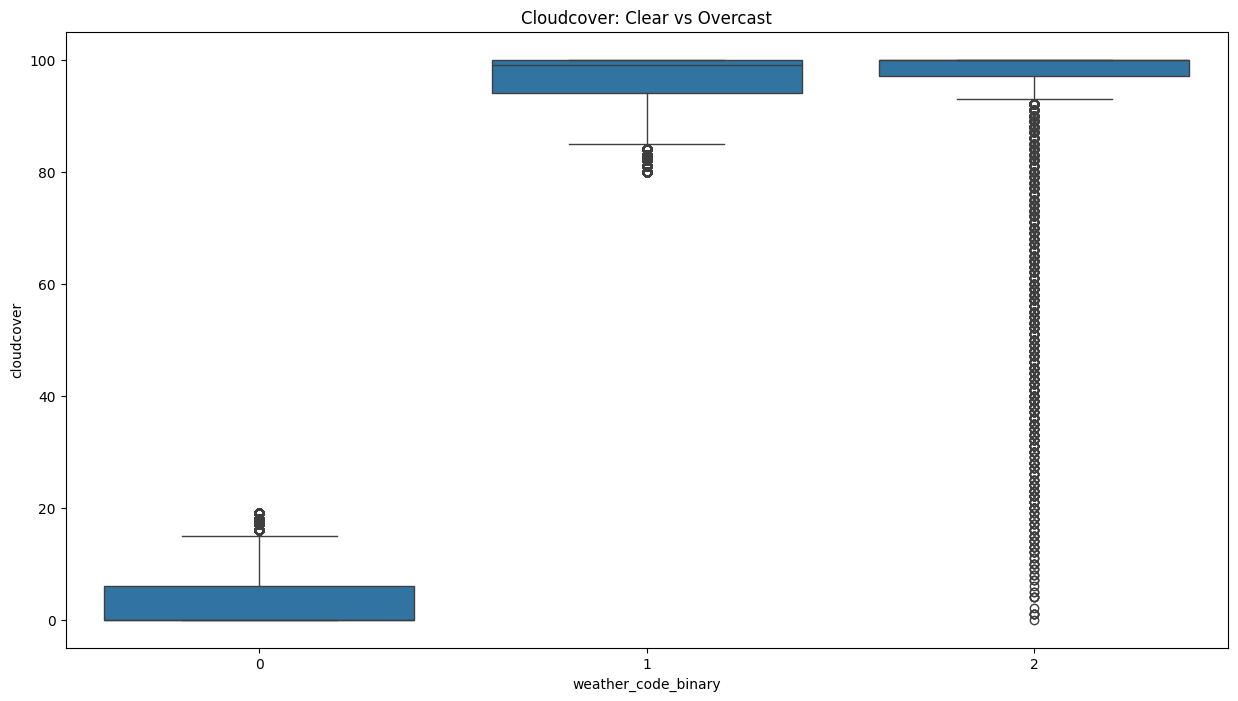

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_binary, x='weather_code_binary', y='cloudcover')
plt.title("Cloudcover: Clear vs Overcast")
plt.show()


In [57]:
# rem terrestrial_radiation, sunshine_duration, shortwave_radiation
df_binary.drop(columns=['terrestrial_radiation', 'sunshine_duration', 'shortwave_radiation'], inplace=True)

In [58]:
df_binary.head()

,time,weather_code_map,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,pressure_msl,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,windgusts_10m,winddirection_10m,diffuse_radiation,direct_radiation,weather_code_binary
0,2025-01-01 00:00:00+00:00,Clear sky,13.4,99.0,13.2,13.3,0.0,1014.8,0.0,0.0,0.0,0.0,7.3,14.4,301.0,0.0,0.0,0
1,2025-01-01 01:00:00+00:00,Overcast,13.3,99.0,13.1,13.4,0.0,1016.0,93.0,93.0,0.0,0.0,5.8,14.8,304.0,1.0,0.0,1
2,2025-01-01 02:00:00+00:00,Overcast,14.4,96.0,13.8,14.3,0.0,1016.9,100.0,100.0,0.0,0.0,9.4,17.6,313.0,43.0,10.0,1
3,2025-01-01 03:00:00+00:00,Overcast,15.9,88.0,13.9,15.5,0.0,1017.8,90.0,90.0,0.0,0.0,11.4,23.4,319.0,124.0,24.0,1
5,2025-01-01 05:00:00+00:00,Clear sky,19.5,75.0,15.0,20.1,0.0,1017.2,4.0,4.0,0.0,0.0,7.1,20.2,324.0,164.0,304.0,0


In [59]:
df_binary.drop(columns=['precipitation'], inplace=True)

# Preprocessing

In [60]:
# remove the 'weather_code_map' column
df_binary.drop(columns=['weather_code_map'], inplace=True)

In [61]:
# convert time to datetime
df_binary['time'] = pd.to_datetime(df_binary['time'])

In [62]:
df_binary['time']

0        2025-01-01 00:00:00+00:00
1        2025-01-01 01:00:00+00:00
2        2025-01-01 02:00:00+00:00
3        2025-01-01 03:00:00+00:00
5        2025-01-01 05:00:00+00:00
                    ...           
222787   2024-12-31 19:00:00+00:00
222788   2024-12-31 20:00:00+00:00
222789   2024-12-31 21:00:00+00:00
222790   2024-12-31 22:00:00+00:00
222791   2024-12-31 23:00:00+00:00
Name: time, Length: 142326, dtype: datetime64[ns, UTC]

In [63]:
# extract date, time, month, year, hour, minute
df_binary['weekday'] = df_binary['time'].dt.weekday
df_binary['times'] = df_binary['time'].dt.time
df_binary['month'] = df_binary['time'].dt.month
df_binary['year'] = df_binary['time'].dt.year
df_binary['hour'] = df_binary['time'].dt.hour
df_binary['minute'] = df_binary['time'].dt.minute

In [64]:
df_binary.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,pressure_msl,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,...,winddirection_10m,diffuse_radiation,direct_radiation,weather_code_binary,weekday,times,month,year,hour,minute
0,2025-01-01 00:00:00+00:00,13.4,99.0,13.2,13.3,1014.8,0.0,0.0,0.0,0.0,...,301.0,0.0,0.0,0,2,00:00:00,1,2025,0,0
1,2025-01-01 01:00:00+00:00,13.3,99.0,13.1,13.4,1016.0,93.0,93.0,0.0,0.0,...,304.0,1.0,0.0,1,2,01:00:00,1,2025,1,0
2,2025-01-01 02:00:00+00:00,14.4,96.0,13.8,14.3,1016.9,100.0,100.0,0.0,0.0,...,313.0,43.0,10.0,1,2,02:00:00,1,2025,2,0
3,2025-01-01 03:00:00+00:00,15.9,88.0,13.9,15.5,1017.8,90.0,90.0,0.0,0.0,...,319.0,124.0,24.0,1,2,03:00:00,1,2025,3,0
5,2025-01-01 05:00:00+00:00,19.5,75.0,15.0,20.1,1017.2,4.0,4.0,0.0,0.0,...,324.0,164.0,304.0,0,2,05:00:00,1,2025,5,0


In [65]:
df_binary.drop('time', axis=1, inplace=True)

In [66]:
df_binary.drop('times', axis=1, inplace=True)

In [67]:
X = df_binary.drop('weather_code_binary', axis=1)
y = df_binary['weather_code_binary']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=3, stratify=y)

In [70]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [72]:
lr.fit(X_train_scale, y_train)

C:\Users\shahr\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_pred = lr.predict(X_test_scale)

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
accuracy_score(y_test, y_pred)

0.9542963535445795

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17003
           1       0.91      0.96      0.93      9185
           2       0.78      0.59      0.67      2278

    accuracy                           0.95     28466
   macro avg       0.90      0.85      0.87     28466
weighted avg       0.95      0.95      0.95     28466



In [88]:
import numpy as np

In [89]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clear sky', 'Overcast', 'Rain'], yticklabels=['Clear sky', 'Overcast', 'Rain'])
plt.title("Confusion Matrix")
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [31]:
import mlflow

In [34]:
mlflow.set_tracking_uri("http://34.227.105.107:5000/")
mlflow.set_experiment("LR Baseline-Model")

2025/07/30 06:16:57 INFO mlflow.tracking.fluent: Experiment with name 'LR Baseline-Model' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://newbucket29382/982514859032892710', creation_time=1753834617905, experiment_id='982514859032892710', last_update_time=1753834617905, lifecycle_stage='active', name='LR Baseline-Model', tags={}>

In [93]:
from sklearn.metrics import confusion_matrix

2025/07/30 07:52:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/30 07:54:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression Baseline Model at: http://34.227.105.107:5000/#/experiments/982514859032892710/runs/bbfcd55a73d84b14b5121328a83cff41
🧪 View experiment at: http://34.227.105.107:5000/#/experiments/982514859032892710


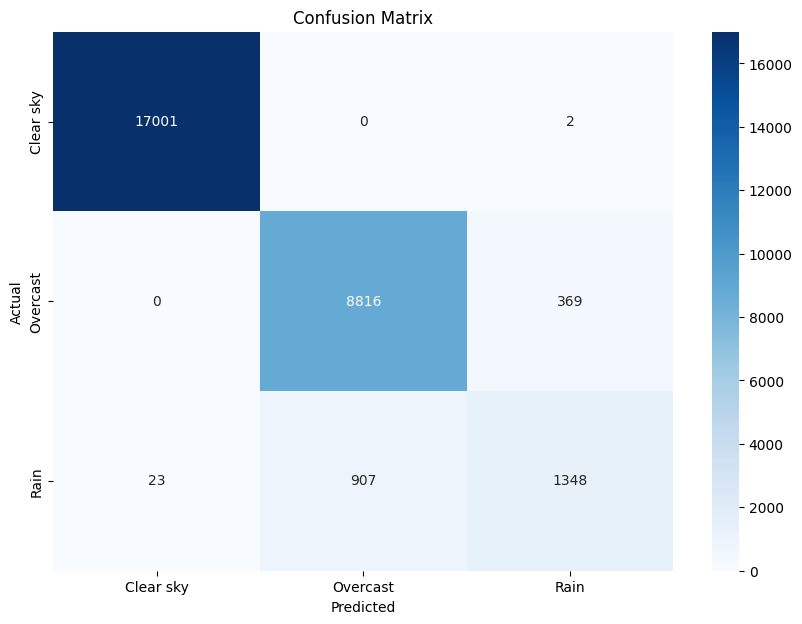

In [99]:
with mlflow.start_run():
    # log the description of the run
    mlflow.set_tag("mlflow.runName", "Logistic Regression Baseline Model")
    mlflow.set_tag("ExperimentType", "Baseline")
    mlflow.set_tag("Model", "Logistic Regression")

    # add description of the model
    mlflow.set_tag("description", "This is a baseline model for weather classification using logistic regression. It predicts weather conditions based on various meteorological features.")

    # log model parameters 
    mlflow.log_param("penalty", lr.penalty)
    mlflow.log_param("dual", lr.dual)
    mlflow.log_param("tol", lr.tol)
    mlflow.log_param("C", lr.C)
    mlflow.log_param("fit_intercept", lr.fit_intercept)
    mlflow.log_param("intercept_scaling", lr.intercept_scaling)
    mlflow.log_param("class_weight", lr.class_weight)
    mlflow.log_param("random_state", lr.random_state)
    mlflow.log_param("solver", lr.solver)
    mlflow.log_param("max_iter", lr.max_iter)
    mlflow.log_param("multi_class", lr.multi_class)
    mlflow.log_param("verbose", lr.verbose)
    mlflow.log_param("warm_start", lr.warm_start)
    mlflow.log_param("n_jobs", lr.n_jobs)
    mlflow.log_param("l1_ratio", lr.l1_ratio)
    
    # log model metrics
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict): # only log metrics
            for metric_name, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", value)
    
    # log confusion matrix as an image
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clear sky', 'Overcast', 'Rain'], yticklabels=['Clear sky', 'Overcast', 'Rain'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # save the confusion matrix plot
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # log the model
    mlflow.sklearn.log_model(lr, "lr_model")

    # log the dataset
    df_binary.to_csv("weather.csv", index=False)
    mlflow.log_artifact('weather.csv')


In [100]:
lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'
